Permeability_grid (md):
 [[720.53141753 677.57958027 531.98051618 ... 808.9302389  821.47198417
  616.0306488 ]
 [997.47731372 474.18433439 602.56443752 ... 413.40074987 140.42844547
  186.31564101]
 [304.47348969 485.75293591 873.79319273 ... 474.95624171  68.29997236
  878.3124566 ]
 ...
 [856.05944086 521.65115831 978.03926941 ... 771.35700828 269.42807544
  810.95240389]
 [522.76109608 811.40098555 563.54046499 ... 341.12675131 433.84675317
  700.88918727]
 [785.96497149 323.92108218 434.44300291 ... 234.50965185 698.97437853
  473.49749504]]
saturation_grid(1 for swept zone, 0 for non-swept zone(low-permeability zone)):
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
The sweep efficiency in the reservoir is 78.44%
----------VISUALIZATION----------


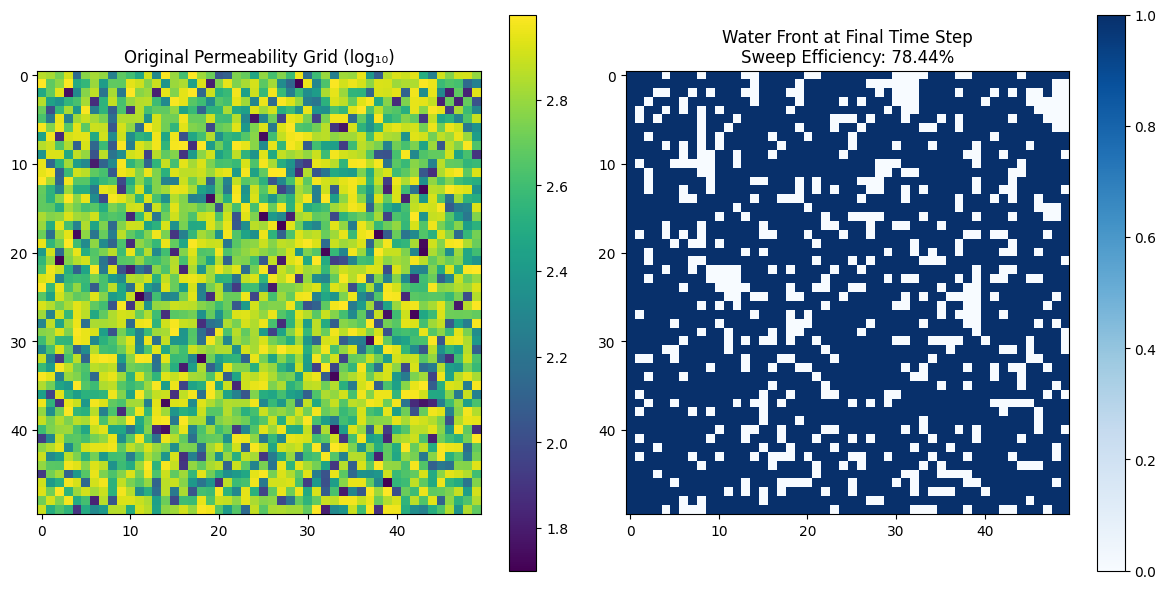

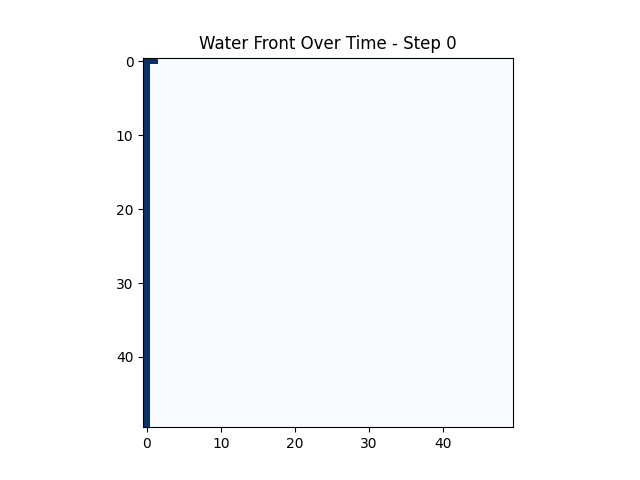

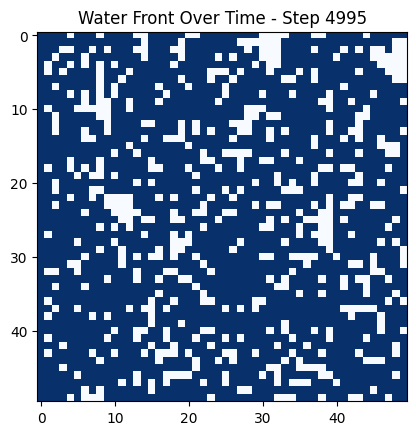

In [ ]:
"""
WATERFLOOD SWEEP EFFICIENCY IN A HETEROGENOUS RESERVOIR
simulating how injected water moves through a reservoir and analyze how rock permeability controls that sweep
GOAL: TO DETERMINE HOW FAR WATER PENETRATES OVER TIME AND WHERE OIL MIGHT BE BYPASSED DUE TO POOR ROCK QUALITY(LOW PERMEABILITY)
"""
import numpy as np
permeability_grid = np.random.uniform(50,1000,(50,50))
permeability_log_grid = np.log10(permeability_grid)
print("Permeability_grid (md):\n",permeability_grid)

#SIMULATING WATER MOVEMENTS (rightward,upward,downward)
#first, I initialize non-saturation across the grid to assume no grid is been swept yet
saturation_grid = np.zeros((50,50))

#Water flooding begins from the left column of the grid and makes them saturated to allow the 20 time steps further more
saturation_grid[:,0] = 1 

# 1 for saturated(water swept)
# 0 for non-saturated (no water swept)

# Store snapshots for animation
frames = []

#SIMULATING WATER FLOW FOR 20 TIME STEPS
for x in range(20):
    new_saturation = saturation_grid.copy()
    for i in range(50):
        for j in range(50):
            if saturation_grid[i, j] == 1:
                for ni, nj in [(i-1, j), (i+1, j), (i, j+1)]:  # up, down, right
                    if 0 <= ni < 50 and 0 <= nj < 50:
                        if permeability_grid[ni, nj] > 250: #if it meets the flow condition of > 150md,sweep it 
                            new_saturation[ni, nj] = 1    
        saturation_grid = new_saturation
        frames.append(saturation_grid.copy())  # Store frame

#TRACKING THE WATER FRONT (0 for non-swept zone, 1 for swept zone)
print("saturation_grid(1 for swept zone, 0 for non-swept zone(low-permeability zone)):\n",saturation_grid)

#COMPUTING THE SWEEP efficiency
swept_cells = np.sum(saturation_grid ==1)
total_cells = saturation_grid.size

sweep_efficiency = (swept_cells)/(total_cells) *100
print(f"The sweep efficiency in the reservoir is {sweep_efficiency:.2f}%")

#VISUALIZATION

print("----------VISUALIZATION----------")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Log-scaled permeability
im1 = axs[0].imshow(permeability_log_grid, cmap='viridis')
axs[0].set_title('Original Permeability Grid (log₁₀)')
fig.colorbar(im1, ax=axs[0])

# Plot 2: Final water saturation (water front)
im2 = axs[1].imshow(saturation_grid, cmap='Blues')
axs[1].set_title(f'Water Front at Final Time Step\nSweep Efficiency: {sweep_efficiency:.2f}%')
fig.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()

#ANIMATION

fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='Blues', vmin=0, vmax=1)
title = ax.set_title("Water Front Over Time - Step 0")

def update(i):
    im.set_array(frames[i])
    title.set_text(f"Water Front Over Time - Step {i*5}")
    return [im, title]

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=300, blit=True)

# Save as GIF
ani.save("saturation_front.gif", writer='pillow', fps=250)

from IPython.display import Image
Image(filename="saturation_front.gif")






























